# Exercise 13: Differential Equations (ODEs)

**Goals**
- Understand how to model simple physical systems with ordinary differential equations (ODEs)
- Implement basic numerical solvers (Euler, RK4)
- Use SciPy's `solve_ivp` to solve 1st/2nd order ODEs and systems of ODEs
- Visualize solutions and compare with analytic results when available

**What you'll use**: `numpy`, `matplotlib`, `scipy.integrate.solve_ivp`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 1. First-Order ODE: Exponential Decay
We start with a simple ODE with a known analytic solution:
\begin{equation}
\frac{dy}{dt} = -k\,y, \qquad y(0) = y_0
\end{equation}
Analytic solution: $y(t) = y_0\,e^{-kt}$.


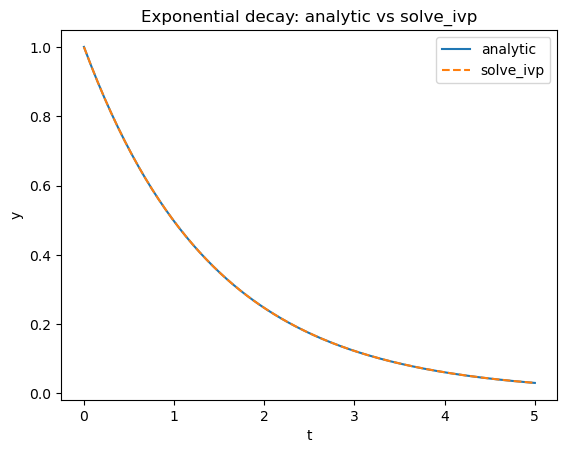

In [3]:
k = 0.7
y0 = 1.0
t_span = (0.0, 5.0)
t_eval = np.linspace(t_span[0], t_span[1], 200)

def decay_rhs(t, y):
    return -k * y

sol = solve_ivp(decay_rhs, t_span, [y0], t_eval=t_eval)

# Analytic solution
y_true = y0 * np.exp(-k * t_eval)

plt.figure()
plt.plot(t_eval, y_true, label='analytic')
plt.plot(sol.t, sol.y[0], '--', label='solve_ivp')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Exponential decay: analytic vs solve_ivp')
plt.legend()
plt.show()


### DIY Solvers: Euler and RK4
Let's implement two classic explicit solvers to see their behavior.


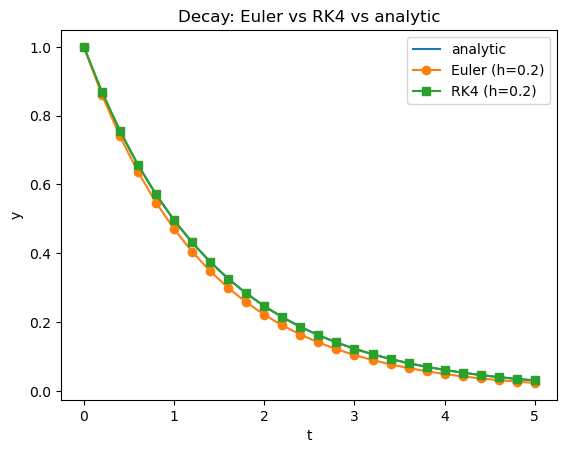

In [4]:
def euler(f, t0, y0, h, n_steps):
    t = np.empty(n_steps+1)
    y = np.empty(n_steps+1)
    t[0], y[0] = t0, y0
    for i in range(n_steps):
        y[i+1] = y[i] + h * f(t[i], y[i])
        t[i+1] = t[i] + h
    return t, y

def rk4(f, t0, y0, h, n_steps):
    t = np.empty(n_steps+1)
    y = np.empty(n_steps+1)
    t[0], y[0] = t0, y0
    for i in range(n_steps):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(t[i] + h,   y[i] + h*k3)
        y[i+1] = y[i] + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        t[i+1] = t[i] + h
    return t, y

# Compare on the decay ODE
h = 0.2
n_steps = int((t_span[1]-t_span[0])/h)
te, ye = euler(decay_rhs, t_span[0], y0, h, n_steps)
tr, yr = rk4(decay_rhs, t_span[0], y0, h, n_steps)

# High-res analytic for reference
t_dense = np.linspace(t_span[0], t_span[1], 400)
y_dense = y0*np.exp(-k*t_dense)

plt.figure()
plt.plot(t_dense, y_dense, label='analytic')
plt.plot(te, ye, 'o-', label='Euler (h=0.2)')
plt.plot(tr, yr, 's-', label='RK4 (h=0.2)')
plt.xlabel('t'); plt.ylabel('y'); plt.legend();
plt.title('Decay: Euler vs RK4 vs analytic')
plt.show()


## 2. Second-Order ODE: Mass–Spring–Damper
Equation: $m\,x'' + c\,x' + k\,x = 0$. Convert to first-order system with $y_1=x,\; y_2=x'$:
\begin{align}
y_1' &= y_2,\\
y_2' &= -(c/m)\,y_2 - (k/m)\,y_1.
\end{align}


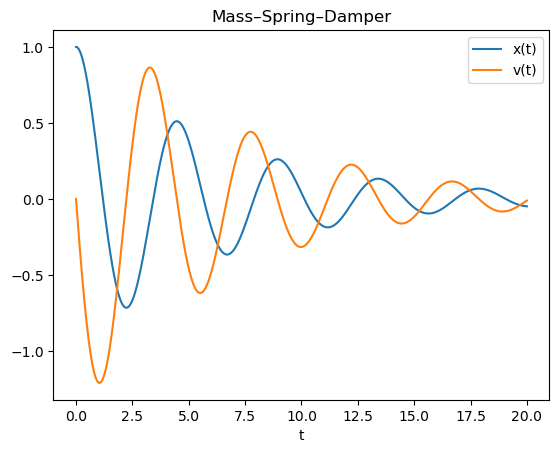

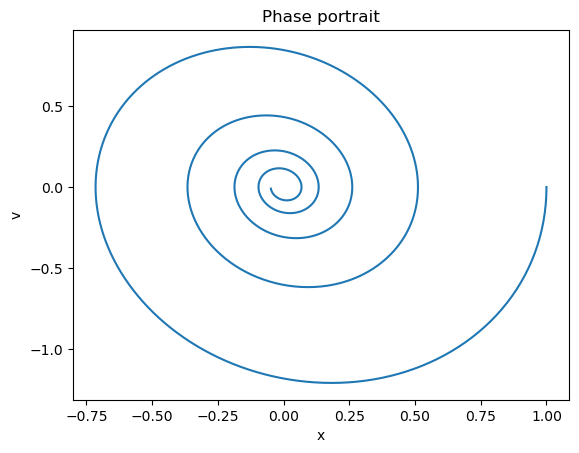

In [5]:
m, c, k_const = 1.0, 0.3, 2.0
def msd_rhs(t, y):
    x, v = y[0], y[1]
    dxdt = v
    dvdt = -(c/m)*v - (k_const/m)*x
    return [dxdt, dvdt]

y0 = [1.0, 0.0]  # initial displacement 1, zero velocity
t_span = (0.0, 20.0)
t_eval = np.linspace(*t_span, 1500)
sol = solve_ivp(msd_rhs, t_span, y0, t_eval=t_eval)

plt.figure()
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='v(t)')
plt.xlabel('t'); plt.title('Mass–Spring–Damper'); plt.legend();
plt.show()

# Phase portrait
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x'); plt.ylabel('v'); plt.title('Phase portrait');
plt.show()


## 3. Nonlinear First-Order ODE: Logistic Growth
$\displaystyle \frac{dy}{dt} = r\,y\Big(1-\frac{y}{K}\Big)$, with growth rate $r$ and carrying capacity $K$.


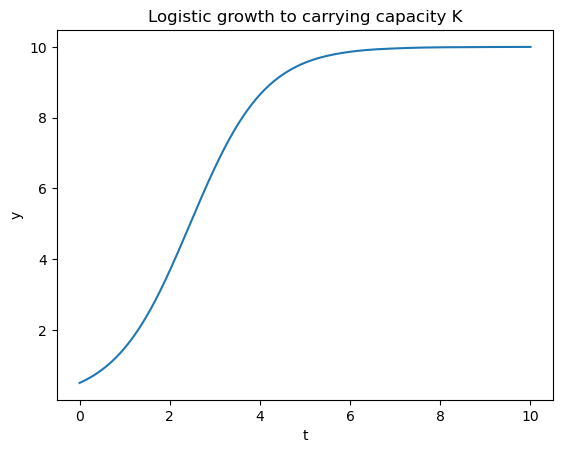

In [6]:
r, K = 1.2, 10.0
def logistic_rhs(t, y):
    return r*y*(1 - y/K)

y0 = [0.5]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 400)
sol = solve_ivp(logistic_rhs, t_span, y0, t_eval=t_eval)

plt.figure()
plt.plot(sol.t, sol.y[0])
plt.xlabel('t'); plt.ylabel('y'); plt.title('Logistic growth to carrying capacity K');
plt.show()
